# Purpose
This folder is made to test [`Rasterio`](https://rasterio.readthedocs.io/) and see if it should be used instead of Pillow. Results here will help us decide the future implementation of this project.

# Installation

1) Install Anaconda/miniconda (if not already installed) 
    - Here's miniconda link: https://docs.conda.io/en/latest/miniconda.html
    - Make sure to **check the box** to "Add Miniconda to PATH" during installation.
    - Restart your terminal after installation.
2) create an environment in conda from the environment file provided:
```bash
    conda env create -f environment.yml
    conda activate rasterenv
```
3) Register conda env for jupyter notebooks (do it while in environment):
```bash
    conda install ipykernel
    python -m ipykernel install --user --name=rasterenv --display-name "Python (rasterenv)"
```


# test code:

Width: 12927
Height: 55801
CRS: EPSG:3413
Bounds: BoundingBox(left=65830.0, bottom=-1193782.0, right=91684.0, top=-1082180.0)
Datatype: ('float32',)
Band shape: (55801, 12927)
Data type: float32
Sample values:
 [[2186.8828125 2186.8984375 2186.90625 ... 2186.765625 2186.7265625
  2186.6953125]
 [2186.890625 2186.8984375 2186.90625 ... 2186.7734375 2186.7421875
  2186.7109375]
 [2186.8984375 2186.8984375 2186.90625 ... 2186.78125 2186.75
  2186.7265625]
 ...
 [2187.09375 2187.09375 2187.09375 ... 2187.046875 2187.078125 2187.09375]
 [2187.078125 2187.078125 2187.0703125 ... 2187.046875 2187.078125
  2187.1015625]
 [2187.0625 2187.0546875 2187.0390625 ... 2187.0390625 2187.0703125
  2187.09375]]
Min: 1596.0312
Max: 2391.1172
Mean: 2270.9309336012


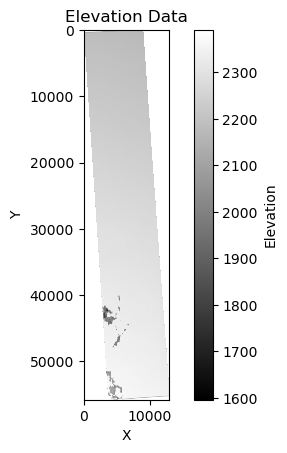

Band type: float32
Total area:  1005101514


In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# below is path to data to test on
# test_file = "../hasan_work/verifyScript/temp/currData_dem.tif"
test_file = "../hasan_work/verifyScript/temp/currData_dem.tif"

with rasterio.open(test_file) as dataset:
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    print("CRS:", dataset.crs)
    print("Bounds:", dataset.bounds)
    print("Datatype:", dataset.dtypes)
    band1 = dataset.read(1)#.astype('float32')  # Read the first band into an array
    notData = dataset.nodata
    band = np.ma.masked_equal(band1, dataset.nodata)
    validData = band1 != notData
    print("Band shape:", band.shape)
    print("Data type:", band.dtype)
    print("Sample values:\n", band[500:550, 500:550])
    print("Min:", np.min(band))
    print("Max:", np.max(band))
    print("Mean:", np.mean(band))

    plt.imshow(band, cmap='gray')
    plt.colorbar(label='Elevation')
    plt.title('Elevation Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    print("Band type:", band1.dtype)
    print("Total area: ", validData.sum() * 2)


In [10]:
import numpy as np

def generate_menger_sponge(level):
    def is_removed(x, y, z):
        while x > 0 or y > 0 or z > 0:
            if (x % 3 == 1 and y % 3 == 1) or (x % 3 == 1 and z % 3 == 1) or (y % 3 == 1 and z % 3 == 1):
                return True
            x //= 3
            y //= 3
            z //= 3
        return False

    size = 3 ** level
    sponge = np.ones((size, size, size), dtype=np.uint8)
    for x in range(size):
        for y in range(size):
            for z in range(size):
                if is_removed(x, y, z):
                    sponge[x, y, z] = 0
    return sponge


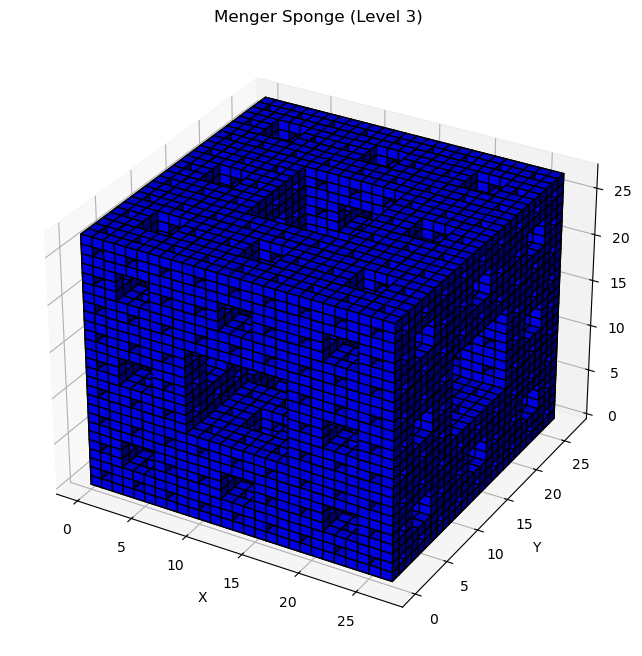

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401; needed for 3D

sponge = generate_menger_sponge(3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert to boolean so matplotlib knows which voxels to draw
filled = sponge.astype(bool)

# Plot voxels (optional: set facecolor or edgecolor)
ax.voxels(filled, facecolors='blue', edgecolor='k')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Menger Sponge (Level 3)")
plt.show()
